In [1]:
import pyodbc
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-K5J59SN;'
                      'Database=BitMedia;'
                      'Trusted_Connection=yes;')
import pandas as pd
branch_df = pd.read_sql_query('SELECT * FROM branch', conn)

branch_df.head()

C:\Users\RafiWangsaSeniang\AppData\Local\Temp\ipykernel_412\1030862172.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  branch_df = pd.read_sql_query('SELECT * FROM branch', conn)


,id,branch_id,branch_name,city
0,1,B001,Bitmedia BSD,Tangerang Selatan
1,2,B002,Bitmedia SCBD,Jakarta Pusat
2,3,B003,Bitmedia Alam Sutera,Tangerang Selatan
3,4,B004,Bitmedia Bintaro,Tangerang Selatan
4,5,B005,Bitmedia Cikarang,Bekasi


In [2]:
books_inventories_df = pd.read_sql_query('SELECT * FROM books_inventories', conn)

C:\Users\RafiWangsaSeniang\AppData\Local\Temp\ipykernel_412\1673492773.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  books_inventories_df = pd.read_sql_query('SELECT * FROM books_inventories', conn)


In [3]:
books_inventories_df.head()

,id,isbn,book_title,book_author,year,publisher,category_id,price,quantity,branch_id
0,1,9780547928227,The Lord of the Rings,J.R.R. Tolkien,1954,Houghton Mifflin,C0005,150000.0,50,B011
1,2,9780451524935,The Hobbit,J.R.R. Tolkien,1937,Houghton Mifflin Harcourt,C0005,100000.0,40,B021
2,3,9780547928227,The Lord of the Rings,J.R.R. Tolkien,1954,Houghton Mifflin,C0005,150000.0,30,B010
3,4,9780062315007,The Hunger Games,Suzanne Collins,2008,Scholastic Press,C0006,90000.0,20,B003
4,5,9780439023528,Harry Potter and the Sorcerer's Stone,J.K. Rowling,1997,Scholastic,C0005,80000.0,40,B015


In [4]:
category_df = pd.read_sql_query('SELECT * FROM category', conn)

C:\Users\RafiWangsaSeniang\AppData\Local\Temp\ipykernel_412\576684261.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  category_df = pd.read_sql_query('SELECT * FROM category', conn)


In [5]:
category_df.head()

,id,category_id,genre,language,cover
0,1,C0001,Fiction,English,Softcover
1,2,C0002,Fiction,English,Hardcover
2,3,C0003,Fiction,Indonesian,Softcover
3,4,C0004,Fiction,Indonesian,Hardcover
4,5,C0005,Non-fiction,English,Softcover


C:\Users\RafiWangsaSeniang\AppData\Local\Temp\ipykernel_412\2183662606.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Branch_info_df = pd.read_sql_query("""


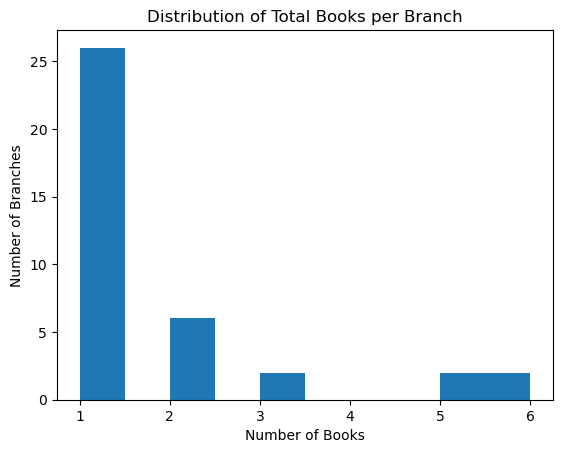

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Execute the SQL query and store the results in a DataFrame (corrected variable name)
Branch_info_df = pd.read_sql_query("""
    SELECT branch_name, COUNT(*) AS total_books
    FROM books_inventories
    JOIN branch ON books_inventories.branch_id = branch.branch_id
    GROUP BY branch_name;
""", conn)  # Replace 'conn' with your database connection object

# Create the histogram (using the correct variable name)
plt.hist(Branch_info_df['total_books'])

# Customize the plot (optional)
plt.xlabel('Number of Books')
plt.ylabel('Number of Branches')
plt.title('Distribution of Total Books per Branch')

# Display the histogram
plt.show()


C:\Users\RafiWangsaSeniang\AppData\Local\Temp\ipykernel_412\1081064256.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cityqnt_info_df = pd.read_sql_query("""


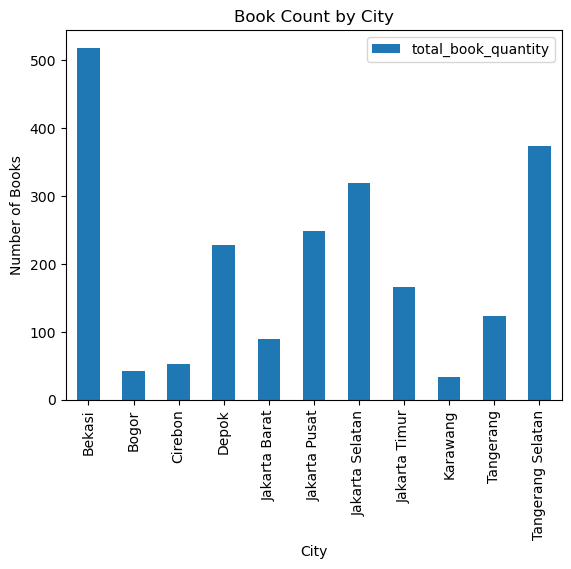

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

cityqnt_info_df = pd.read_sql_query("""
    SELECT city, SUM(quantity) AS total_book_quantity
    FROM books_inventories
    JOIN branch ON books_inventories.branch_id = branch.branch_id
    GROUP BY city;
""", conn)  

cityqnt_info_df.plot(kind='bar', x='city', y='total_book_quantity')  # Use the correct column name

plt.xlabel('City')
plt.ylabel('Number of Books')
plt.title('Book Count by City')

plt.show()



C:\Users\RafiWangsaSeniang\AppData\Local\Temp\ipykernel_412\3439376796.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  city_price_info_df = pd.read_sql_query("""


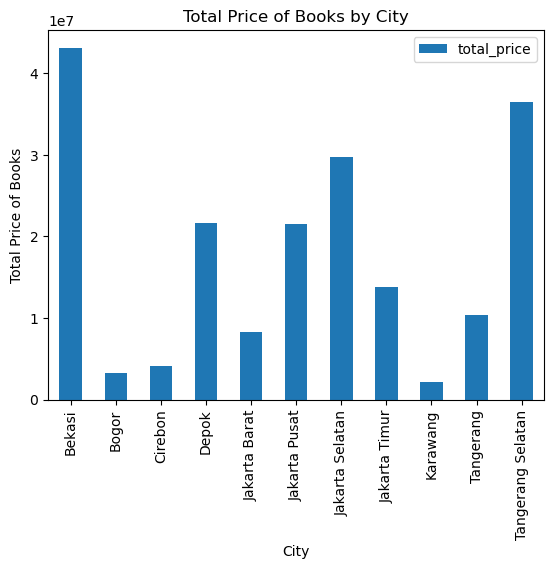

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Execute the updated SQL query
city_price_info_df = pd.read_sql_query("""
    SELECT city, SUM(quantity * price) AS total_price
    FROM books_inventories
    JOIN branch ON books_inventories.branch_id = branch.branch_id
    GROUP BY city;
""", conn)

# Create the bar chart
city_price_info_df.plot(kind='bar', x='city', y='total_price')

# Customize the plot
plt.xlabel('City')
plt.ylabel('Total Price of Books')
plt.title('Total Price of Books by City')

# Display the plot
plt.show()


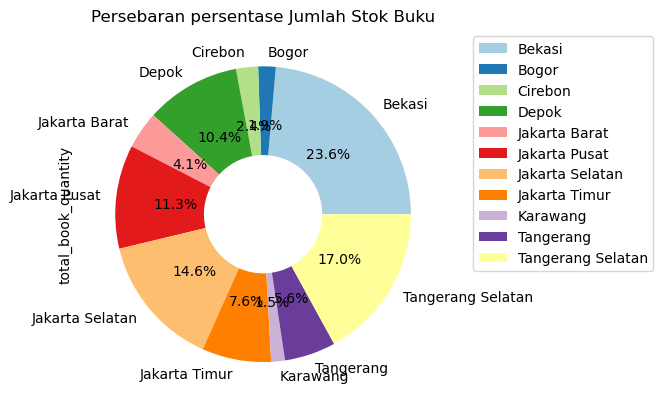

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (your code for SQL query and color setup)

# Create the pie chart
cityqnt_info_df.plot(
    kind="pie",
    y="total_book_quantity",
    autopct="%1.1f%%",
    labels=cityqnt_info_df["city"],
    colors=colors,
    wedgeprops=dict(width=0.6),
)

# Add legend (positioned to the right)
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))  # Adjust bbox_to_anchor values for fine-tuning

# Customize the plot
plt.title("Persebaran persentase Jumlah Stok Buku")

# Display the plot
plt.show()
